# Hands-on Lab: Build an Interactive Dashboard with Ploty Dash

## Screenshoot 1 - Selector using "All Sites" option, no range filter applied with the Payload Range slider 

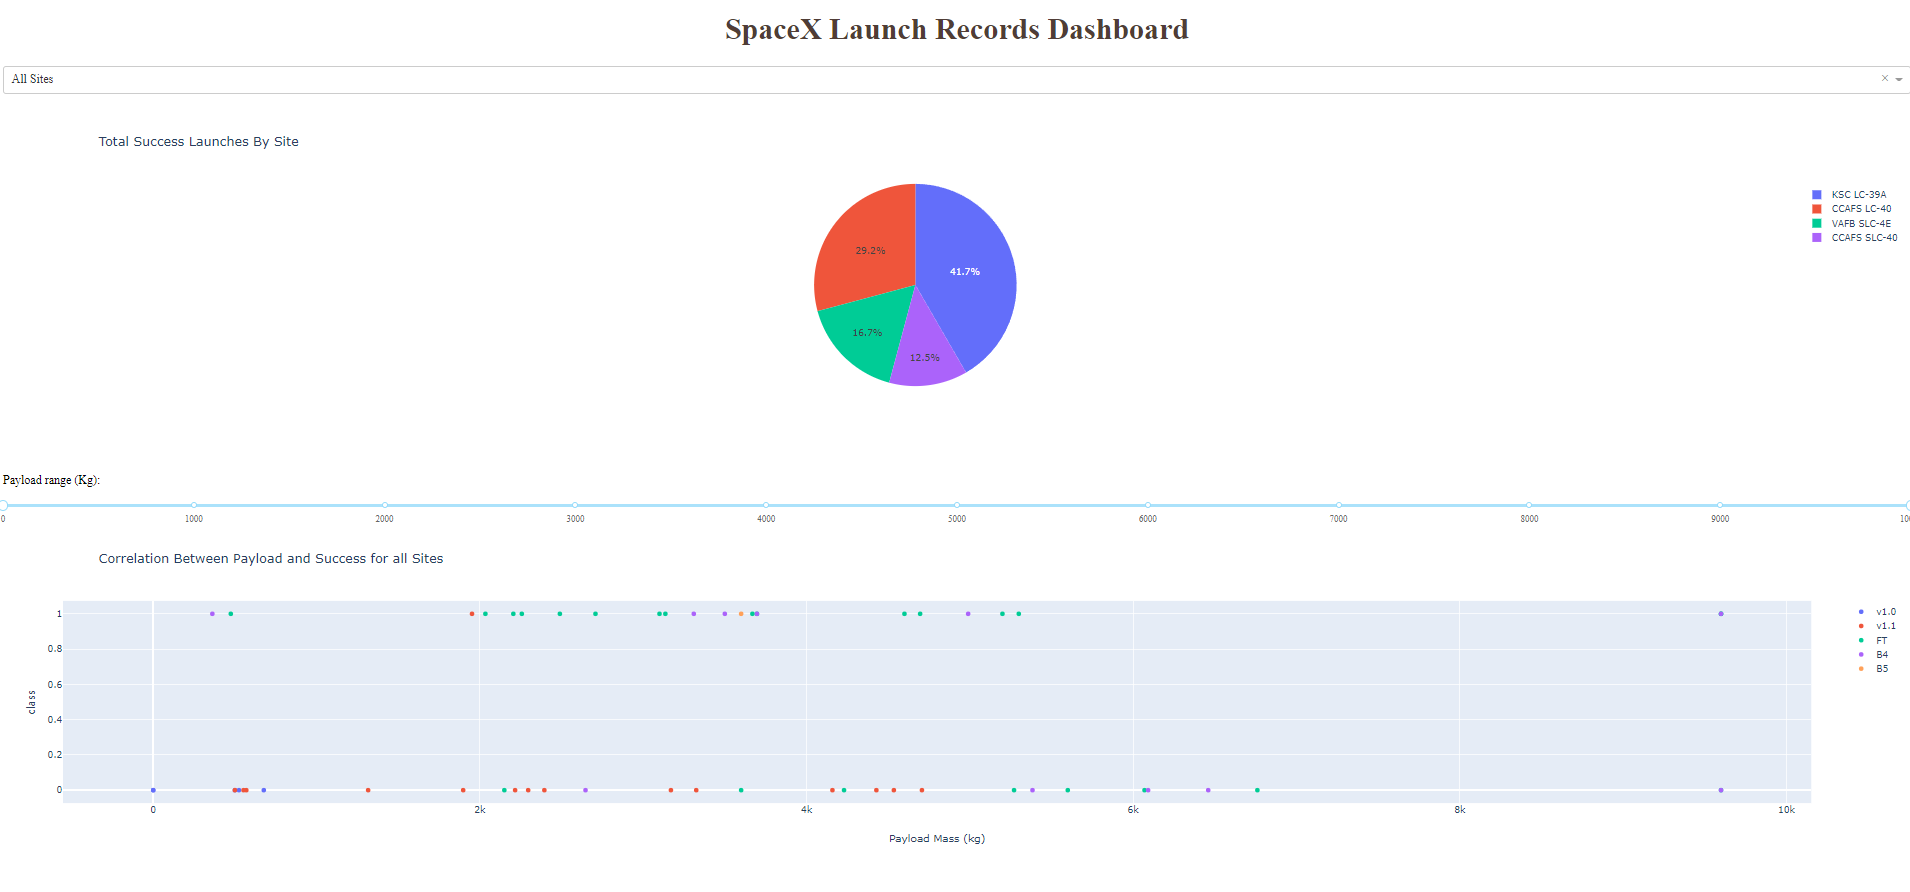

## Screenshoot 2 - Selector using "All Sites" option, range filter applied with the Payload Range slider between 3000 Kg and 7000 KG 

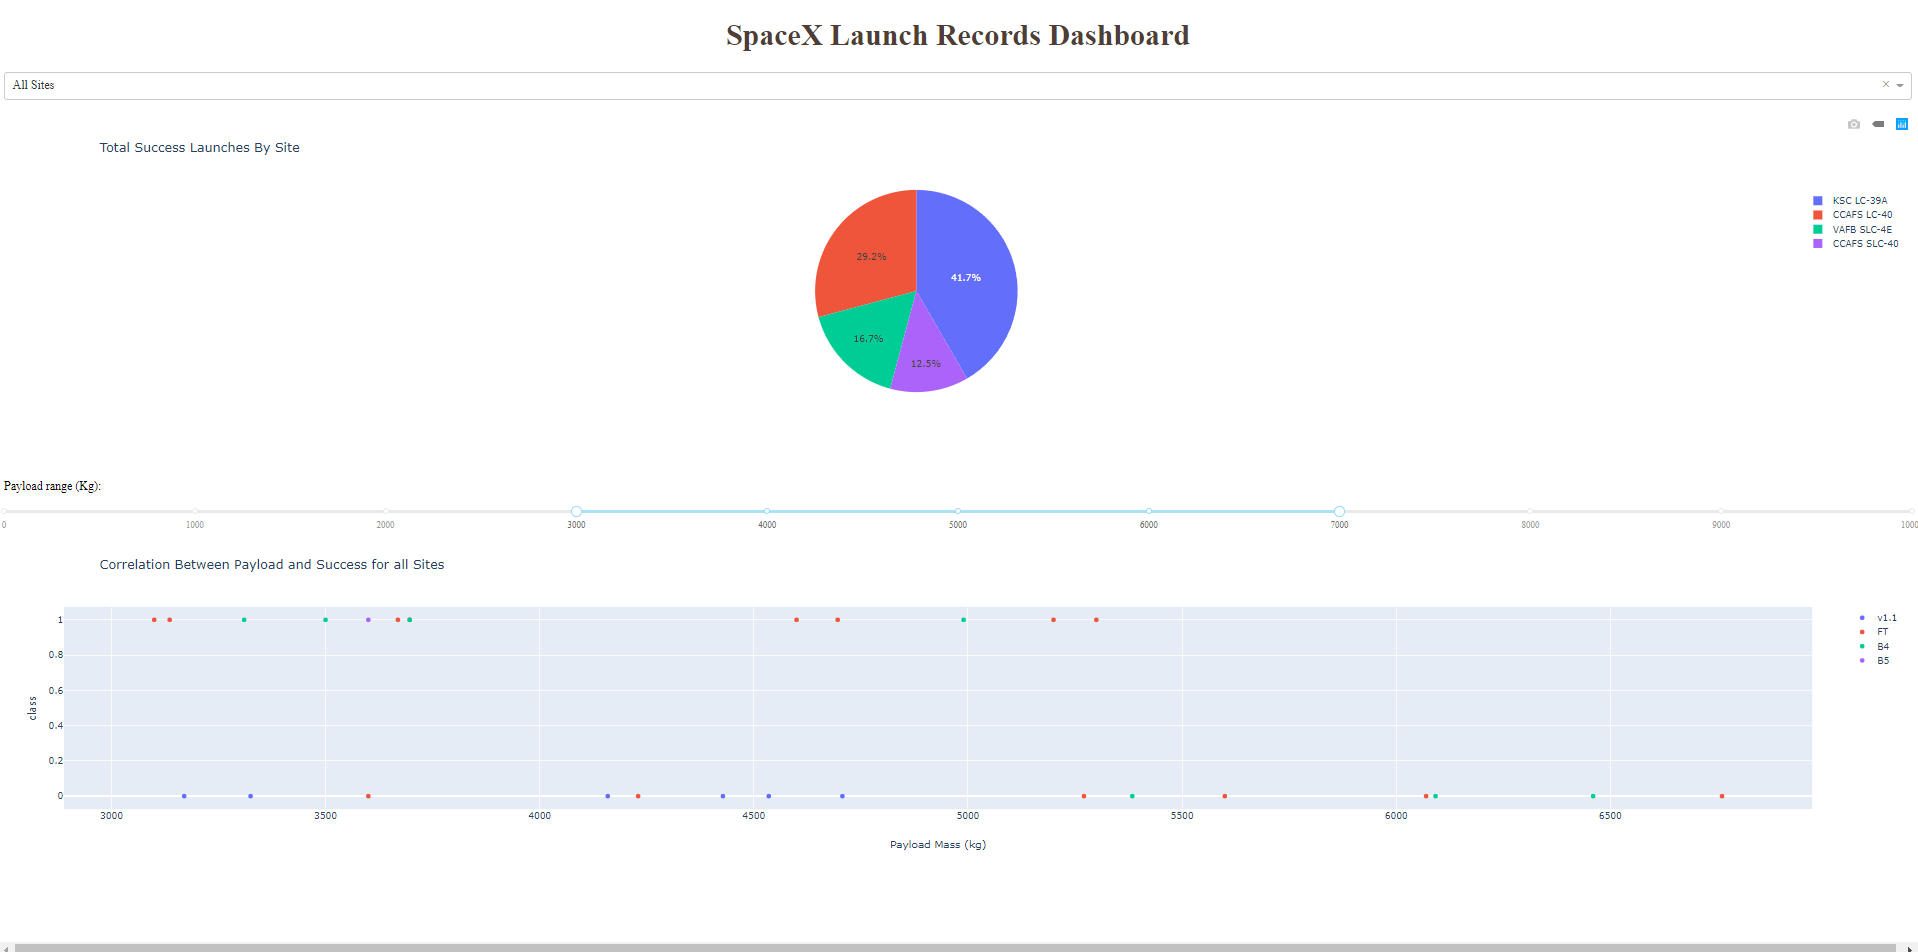

<span style="color:Purple;font-family:Helvetica;font-size:16.0pt"> If we compare both scatter plots, we can see the change on the scale on the "x" axis and also the change on the dots showed.   </span> 

<span style="color:Purple;font-family:Helvetica;font-size:16.0pt"> It is visible also that the selected range is highlighted in light blue.   </span> 


## Screenshoot 3 - Selector using Site "KSC LC-39A" option, no range filter applied with the Payload Range slider 

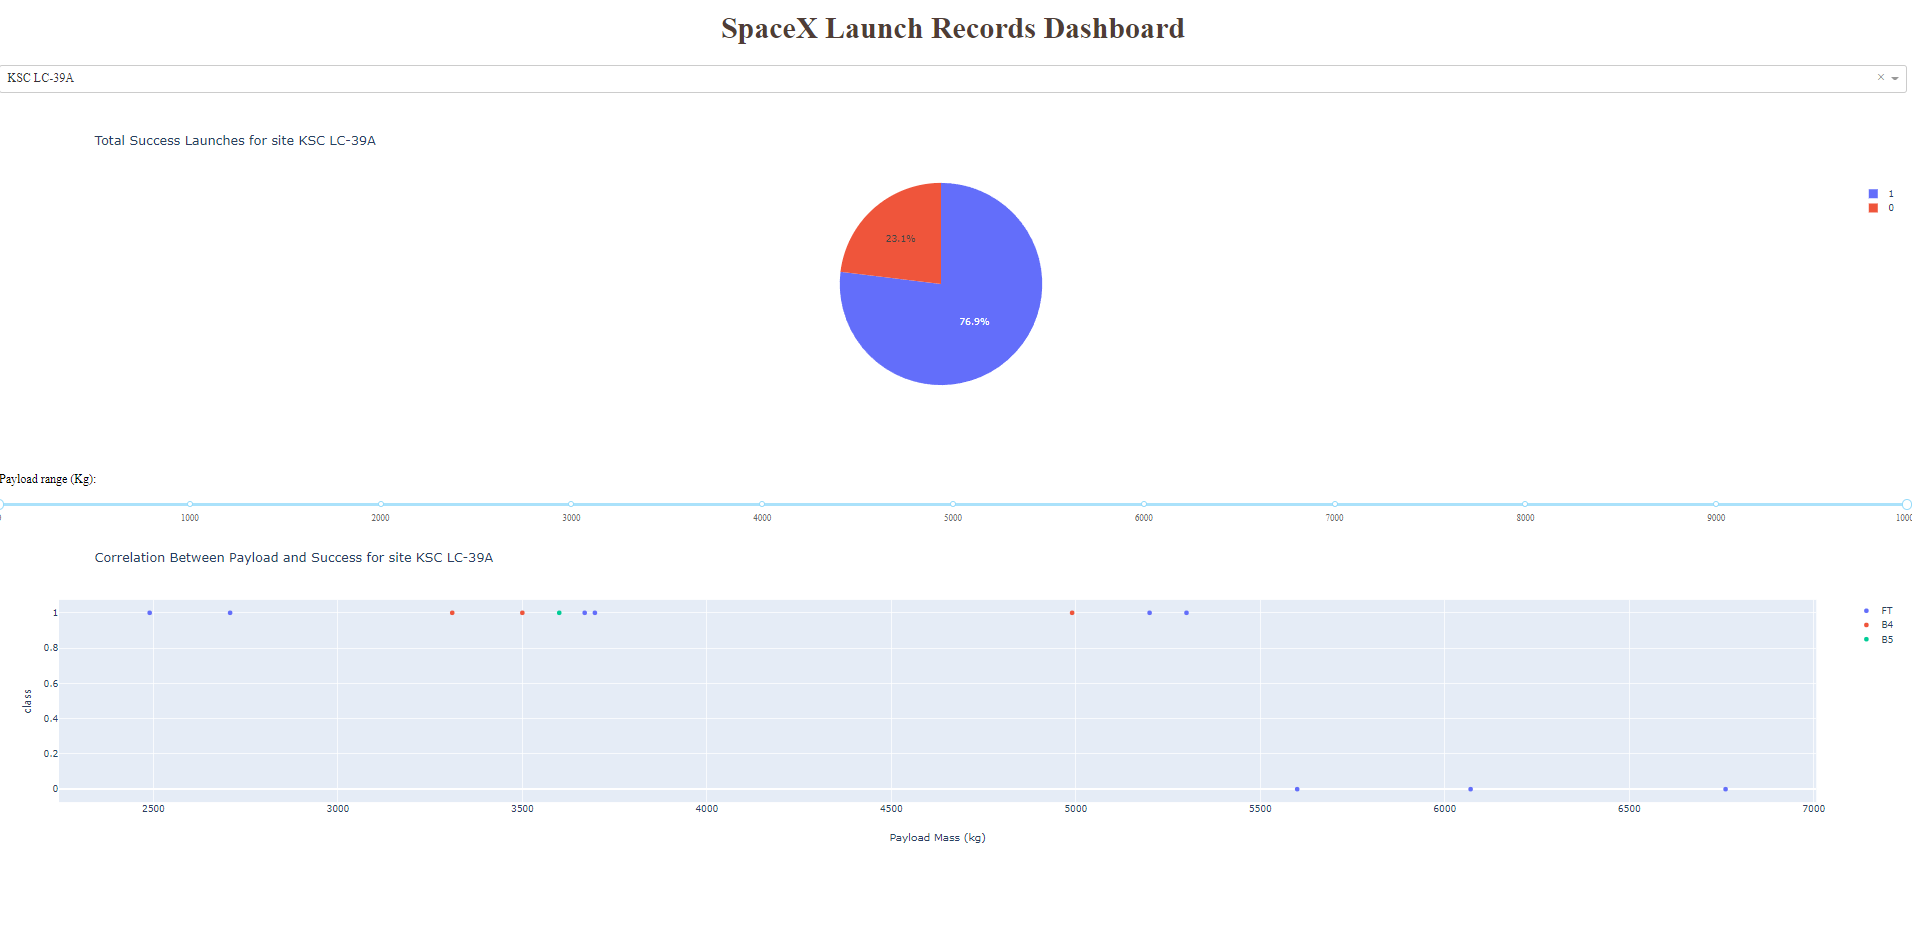

## Screenshoot 4 - Selector using Site "KSC LC-39A" option, range filter applied with the Payload Range slider between 4000 Kg and 10000 KG 

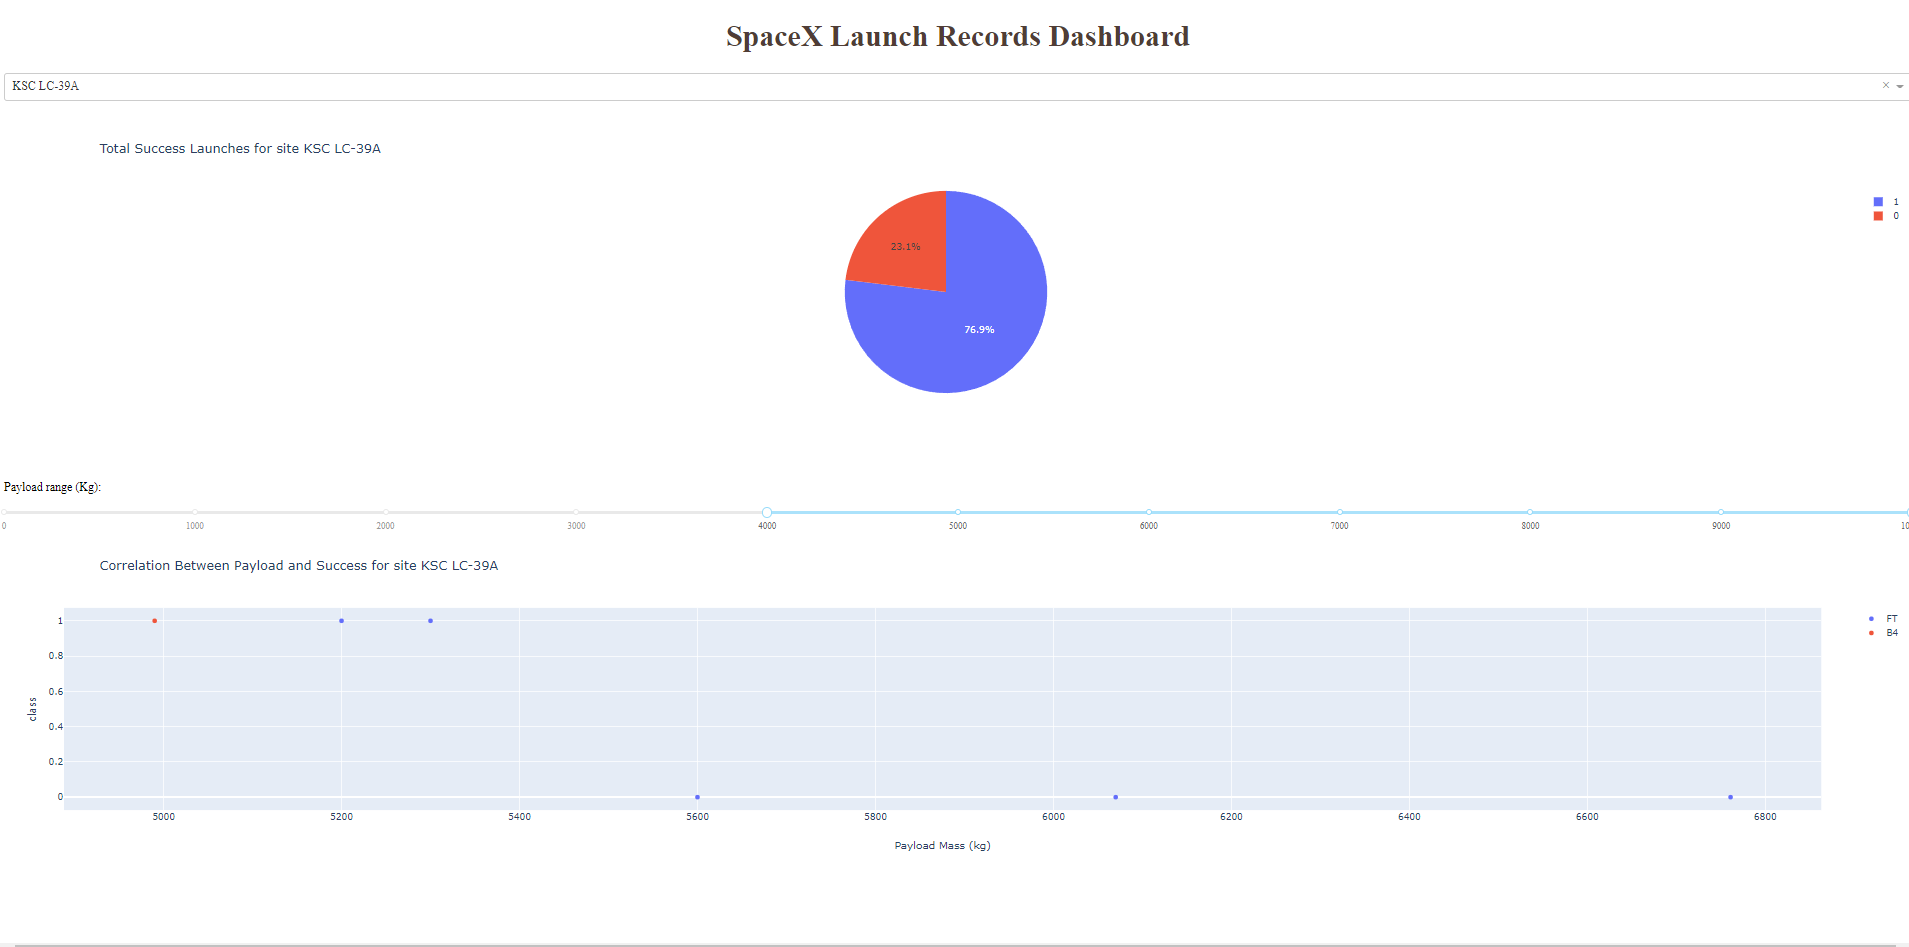

<span style="color:Purple;font-family:Helvetica;font-size:16.0pt"> Again, if we compare both scatter plots, we can see the change on the scale on the "x" axis and also the change on the dots showed.   </span> 

<span style="color:Purple;font-family:Helvetica;font-size:16.0pt"> It is visible also that the selected range is highlighted in light blue.   </span> 


<span style="color:Black;font-family:Helvetica;font-size:18.0pt">
    <br><mark>Finding Insights Visually</mark></br></span> 

<span style="color:Black;font-family:Helvetica;font-size:13.0pt">
Now with the dashboard completed, you should be able to use it to analyze SpaceX launch data, and answer the following questions:

<br>1 - Which site has the largest successful launches?</br>
<br>2 - Which site has the highest launch success rate?</br>
<br>3 - Which payload range(s) has the highest launch success rate?</br>
<br>4 - Which payload range(s) has the lowest launch success rate?</br>
<br>5 - Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?</span> 

<br></br>
<br></br>

<span style="color:Black;font-family:Helvetica;font-size:18.0pt">
    <mark> Responses: </mark></span>
    

<span style="color:Black;font-family:Helvetica;font-size:13.0pt">


<br>1 - KSC LC-39A, this can be checked on the pie chart when "All sites" is selected</br>
<br>2 - The highest success rate is for VAFB SLC-4e, with a 40% success rate, this is easily obtained by going thorugh all the selector options for "Site" and grabbing the highest % with the red reference.  </br>

<br>Please see below table regarding Class 1 events depending on the Pay Load Range</br></span>

| Payload range (kg) | Class 1 results|Total Results| Success Rate|
| :---        |    :----   |    :----   |    :----:   |
| 0 - 1000      | 2 | 8| 25%|
| 1000 - 2000   | 1 | 3| 33.3 %|
| 2000 - 3000   | 5 | 10| 50%|
| 3000 - 4000   | 7 | 10|70%|
| 4000 - 5000   | 3 | 8| 37.5%|
| 5000 - 6000   | 2 | 5| 40% |
| 6000 - 7000   | 0 | 4| 0%|
| 7000 - 8000   | 0 |0| NA|
| 8000 - 9000   | 0 |0| NA|
| 9000 - 10000   | 1 |2| 50%|

<span style="color:Black;font-family:Helvetica;font-size:13.0pt"><br><u><mark>The above table was constructed by using the slider for the Pay Load Range and counting the dots graphed, with "All Sites" selected. </u></mark></br></span> 


<span style="color:Black;font-family:Helvetica;font-size:13.0pt">
<br>3 - The Payload range with highest launch success rate is between 3000 KG and 4000 KG, with a 70% success rate </br>
<br>4 - The Payload range with lowest launch success rate is between 6000 KG and 7000 KG, with a 0% success rate</br>
<br>5 - FT selected as a booster has the highest number of successful launches, this can be checked on the "all sites" option and no slider filtter applied, on the value 1, the reference with more dots is FT.</span> 

<span style="color:Black;font-family:Helvetica;font-size:16.0pt">
<br><mark>See below the code for file spacex_dash_app.py</br></mark>
<br><mark>Download the file and also the csv file "spacex_launch_dash.csv", then execute with Python. </mark></br>
    <br><mark>https://github.com/IbraTebas/Capstone-Watson/tree/master
    </mark></br></span> 

### Import required libraries
from turtle import filling
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

### Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

def filter_launch_site(entered_site):
        df_filtered = spacex_df[spacex_df['Launch Site'] == entered_site]
        total_records = df_filtered.shape[0]
        success = df_filtered["class"].sum()
        data = [["1", success], ['0', total_records - success]]
        data = pd.DataFrame(data)
        data.columns=['class', 'values']
        return data


### Create a dash application
app = dash.Dash(__name__)

### Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
### TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                options=[
                    {'label': 'All Sites', 'value': 'ALL'},
                    {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                    {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                    {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                    {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                ],
                value='ALL',
                placeholder="Select a Launch Site here",
                searchable=True
                ),
                                html.Br(),

 ### TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
 ### TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       1000: '1000',
                       2000: '2000',
                       3000: '3000',
                       4000: '4000',
                       5000: '5000',
                       6000: '6000',
                       7000: '7000',
                       8000: '8000',
                       9000: '9000',
                       10000: '10000'},
                value=[min_payload, max_payload]),
                                html.Br(),
  ### TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                html.Br()])

### TASK 2:
### Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(spacex_df, values='class', 
        names='Launch Site', 
        title='Total Success Launches By Site')
        return fig
    else:
        data = filter_launch_site(entered_site)
        fig = px.pie(data, values='values', 
        names='class', 
        title='Total Success Launches for site {}'.format(entered_site))
        return fig
### TASK 4:
### Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output

@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value'), 
    Input(component_id='payload-slider', component_property='value'))
def get_scatter_chart(entered_site, slider_range):
    if entered_site == 'ALL':
        filtered_df = spacex_df[spacex_df['Payload Mass (kg)'] <= int(slider_range[1])]
        filtered_df = filtered_df[filtered_df['Payload Mass (kg)'] >=int(slider_range[0])]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y="class", color = 'Booster Version Category', title="Correlation Between Payload and Success for all Sites" )
        return fig
    else: 
        filtered_df = spacex_df[spacex_df['Payload Mass (kg)'] <= int(slider_range[1])] 
        filtered_df = filtered_df[filtered_df['Payload Mass (kg)'] >=int(slider_range[0])]
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y="class", color = 'Booster Version Category', title='Correlation Between Payload and Success for site {}'.format(entered_site))
        return fig

## Run the app
if __name__ == '__main__':
    app.run_server()
